# Цель проекта
Разработать аналитическую систему для эпидемиологического мониторинга COVID-19 на основе метаданных рентгеновских снимков, используя стек PySpark.

# Датасет
Используется репозиторий COVID-19 Chest X-Ray Dataset, который содержит:

Метаданные: файл metadata.csv с полями:

`patientid` (идентификатор пациента)

`age` (возраст, есть не для всех записей)

`sex` (пол, не для всех записей)

`finding` (диагноз: COVID-19, Pneumonia, Normal и другие)

`view` (проекция снимка: PA, AP и так далее)

`date` (дата исследования)

# Подготовка среды

In [ ]:
# 🧩 Установка PySpark
!pip install -q pyspark

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("COVID_Metadata_Analytics") \
    .config("spark.sql.shuffle.partitions", "4") \
    .getOrCreate()

spark


 Сессия spark создана и проверена. Можно приступать к работе с данными

# Предобработка данных

In [ ]:
import pandas as pd
df = pd.read_csv("metadata.csv")
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [ ]:
pd.set_option('display.max_rows', None)
df['date']


,date
0,"January 22, 2020"
1,"January 25, 2020"
2,"January 27, 2020"
3,"January 28, 2020"
4,"January 25, 2020"
5,"January 30, 2020"
6,2017
7,"January 6, 2020"
8,"January 10, 2020"
9,2004


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               950 non-null    object 
 1   offset                  697 non-null    float64
 2   sex                     870 non-null    object 
 3   age                     713 non-null    float64
 4   finding                 950 non-null    object 
 5   RT_PCR_positive         593 non-null    object 
 6   survival                361 non-null    object 
 7   intubated               248 non-null    object 
 8   intubation_present      250 non-null    object 
 9   went_icu                397 non-null    object 
 10  in_icu                  335 non-null    object 
 11  needed_supplemental_O2  90 non-null     object 
 12  extubated               37 non-null     object 
 13  temperature             78 non-null     float64
 14  pO2_saturation          119 non-null    fl

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
offset,697.0,9.083214,31.664077,-360.00,1.0000,5.000,10.0000,365.0
age,713.0,53.534362,16.949007,18.00,40.0000,54.000,68.0000,94.0
temperature,78.0,38.898718,6.494383,36.00,37.8000,38.150,38.9750,95.0
pO2_saturation,119.0,78.475630,38.742573,20.00,55.0000,85.000,95.0000,340.0
leukocyte_count,16.0,5.024375,2.660341,0.22,3.0675,4.745,6.8575,11.2
neutrophil_count,28.0,5.307143,3.489956,0.00,2.7250,4.800,6.9250,12.9
lymphocyte_count,40.0,4.638050,20.550033,0.40,0.7465,1.100,1.6000,131.0


In [ ]:
#@title Исправим аномалию в сатурации (нормальный физиологический диапазон 50–100%)
df.loc[(df['pO2_saturation'] < 20) | (df['pO2_saturation'] > 100), 'pO2_saturation'] = None


In [ ]:
#@title Исправим аномалию с лейкоциатами (нули и невозможноые значения)
cols = ['leukocyte_count','lymphocyte_count','neutrophil_count']

for c in cols:
    df.loc[df[c] <= 0, c] = None
    df.loc[df[c] > 50, c] = None

In [ ]:
#@title Исправим температурнюую аномалию
df.loc[(df['temperature'] < 30) | (df['temperature'] > 45), 'temperature'] = None


'Unnamed: 29' не содержит почти ничего. Можно удалить



In [ ]:
df = df.drop(columns=['Unnamed: 29'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               950 non-null    object 
 1   offset                  697 non-null    float64
 2   sex                     870 non-null    object 
 3   age                     713 non-null    float64
 4   finding                 950 non-null    object 
 5   RT_PCR_positive         593 non-null    object 
 6   survival                361 non-null    object 
 7   intubated               248 non-null    object 
 8   intubation_present      250 non-null    object 
 9   went_icu                397 non-null    object 
 10  in_icu                  335 non-null    object 
 11  needed_supplemental_O2  90 non-null     object 
 12  extubated               37 non-null     object 
 13  temperature             77 non-null     float64
 14  pO2_saturation          111 non-null    fl

In [ ]:
#@title ПОдсчет пропусков
import matplotlib.pyplot as plt

df.isnull().sum().sort_values(ascending=False)

,0
leukocyte_count,934
neutrophil_count,923
extubated,913
lymphocyte_count,911
temperature,873
needed_supplemental_O2,860
pO2_saturation,839
intubated,702
intubation_present,700
in_icu,615


Чем больше пропусков, тем меньше смысла сохранять этот признак - для красоты сделаем сфетофор, где красное - точно удалим, зеленое - точно оставим

| Признак                | Пропусков | Оценка                                   |
| ---------------------- | --------- | ---------------------------------------- |
| leukocyte_count        | 934       | ❌   |
| neutrophil_count       | 922       | ❌                            |
| extubated              | 913       | ❌                           |
| lymphocyte_count       | 910       | ❌                           |
| temperature            | 872       | ❌                           |
| needed_supplemental_O2 | 860       | ❌                           |
| pO2_saturation         | 839       | ❌                           |
| intubated              | 702       | ⚠️                          |
| intubation_present     | 700       | ⚠️                                    |
| in_icu                 | 615       | ⚠️                                    |
| survival               | 589       | ⚠️                                    |
| doi                    | 568       | ⚠️                                    |
| went_icu               | 553       | ⚠️                                    |
| other_notes            | 514       | ⚠️                                    |
| RT_PCR_positive        | 357       | 🟡                                    |
| date                   | 289       | 🟡                                    |
| offset                 | 253       | 🟡                                    |
| license                | 245       | 🟡                                    |
| age                    | 237       | 🟢                                    |
| clinical_notes         | 182       | 🟢                                    |
| sex                    | 80        | 🟢                                    |
| location               | 56        | 🟢                                    |
| остальные              | 0         | ✔️ Полные                                |


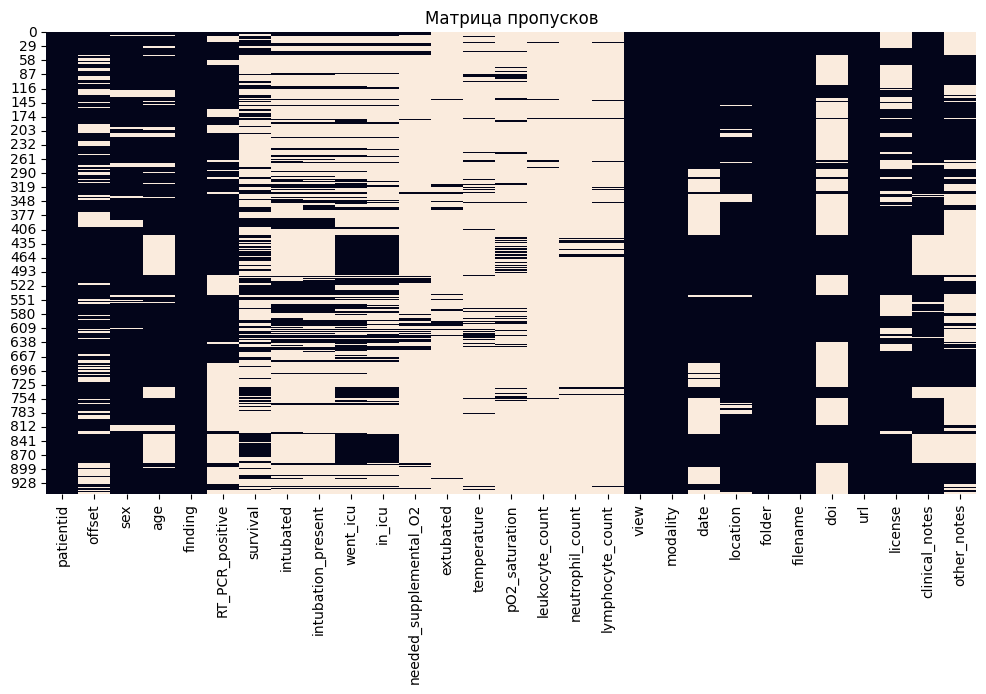

In [ ]:
#@title Визуализация пропусков
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Матрица пропусков")
plt.show()

🟡 date

содержит огромное количество мусора: "2020", "2004", "March 2003", "January 12"

невозможно привести к чистому datetime без потери данных

In [ ]:
#@title Удалим почти пустые столбцы
cols_to_drop = [
    'leukocyte_count', 'neutrophil_count', 'lymphocyte_count',
    'temperature', 'pO2_saturation', 'needed_supplemental_O2',
    'extubated', 'date' #дату тоже удаляем она выглядит базобразно и будет только мешать
]

df = df.drop(columns=cols_to_drop)


In [ ]:
#@ Заменим пропуски на самые частотные значения в категориальных признаках
cat_cols = ["location", "RT_PCR_positive", "intubated",
            "intubation_present", "in_icu", "went_icu",
            "other_notes", "license", "location"]

for col in cat_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [ ]:
#@title Заполняем Unknown, где лучше не гадать на кофейной гуще
df["sex"] = df["sex"].fillna("Unknown")
df["survival"] = df["survival"].fillna("Unknown")
df["clinical_notes"] = df["clinical_notes"].fillna("Unknown")

In [ ]:
#@title Заполняем часть полей медианой
df["offset"] = df["offset"].fillna(df["offset"].median())
df["age"] = df["age"].fillna(df["age"].median())

In [ ]:
#@title Добавим возрастные группы
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 18, 30, 45, 60, 75, 120],
    labels=["0-18", "19-30", "31-45", "46-60", "61-75", "75+"],
    right=False
)

In [ ]:
#@title Посмотрим, как табличка выглядит теперь
df.head(50)

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,modality,location,folder,filename,doi,url,license,clinical_notes,other_notes,age_group
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,X-ray,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,CC BY-NC-SA,"On January 22, 2020, a 65-year-old man with a ...",Since January 2020 Elsevier has created a COVI...,61-75
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,X-ray,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,CC BY-NC-SA,"On January 22, 2020, a 65-year-old man with a ...",Since January 2020 Elsevier has created a COVI...,61-75
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,X-ray,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,CC BY-NC-SA,"On January 22, 2020, a 65-year-old man with a ...",Since January 2020 Elsevier has created a COVI...,61-75
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,X-ray,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,CC BY-NC-SA,"On January 22, 2020, a 65-year-old man with a ...",Since January 2020 Elsevier has created a COVI...,61-75
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,Unknown,N,N,N,...,X-ray,"Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,CC BY-NC-SA,diffuse infiltrates in the bilateral lower lungs,Since January 2020 Elsevier has created a COVI...,46-60
5,4,5.0,F,52.0,Pneumonia/Viral/COVID-19,Y,Unknown,N,N,N,...,X-ray,"Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1b.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,CC BY-NC-SA,progressive diffuse interstitial opacities and...,Since January 2020 Elsevier has created a COVI...,46-60
6,5,5.0,Unknown,54.0,Pneumonia,Y,Unknown,Y,Y,Y,...,X-ray,"Hannover Medical School, Hannover, Germany",images,ARDSSevere.png,NaN,https://en.wikipedia.org/wiki/File:ARDSSevere.png,CC BY-SA,Severe ARDS. Person is intubated with an OG in...,Since January 2020 Elsevier has created a COVI...,46-60
7,6,0.0,Unknown,54.0,Pneumonia/Viral/COVID-19,Y,Unknown,Y,Y,Y,...,X-ray,"Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...",images,lancet-case2a.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/arti...,CC BY-NC-SA,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,Since January 2020 Elsevier has created a COVI...,46-60
8,6,4.0,Unknown,54.0,Pneumonia/Viral/COVID-19,Y,Unknown,Y,Y,Y,...,X-ray,"Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...",images,lancet-case2b.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/arti...,CC BY-NC-SA,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,Since January 2020 Elsevier has created a COVI...,46-60
9,3,4.0,M,74.0,Pneumonia/Viral/SARS,Y,N,Y,N,Y,...,X-ray,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,CC BY-NC-SA,SARS in a 74-year-old man who developed sympto...,Since January 2020 Elsevier has created a COVI...,61-75


# Унифицируем диагнозы

In [ ]:
df['finding'].value_counts()


,count
finding,
Pneumonia/Viral/COVID-19,584
todo,83
Pneumonia,81
Pneumonia/Fungal/Pneumocystis,30
Pneumonia/Bacterial/Streptococcus,22
No Finding,22
Tuberculosis,18
Pneumonia/Viral/SARS,16
Pneumonia/Lipoid,13


Уберем пробелы по краям, оставим базовые категории и уницифируем остальные

In [ ]:
#@title напишем функцию для объединения категорий
def unify_finding(value: str) -> str:
    if pd.isna(value):
        return 'Unknown'

    v = value.strip()

    if v == 'Pneumonia/Viral/COVID-19':
        return 'COVID-19'
    if v == 'todo':
        return 'Unknown'

    if v in ['No Finding', 'Pneumonia', 'Tuberculosis', 'Unknown']:
        return v

    if v.startswith('Pneumonia/'):
        parts = v.split('/')
        if len(parts) >= 3 and parts[1] in ['Bacterial', 'Viral', 'Fungal']:
            return f'{parts[0]}/{parts[1]}'
        return v

    return v

df['finding_unified'] = df['finding'].apply(unify_finding)


In [ ]:
df['finding_unified'].value_counts()


,count
finding_unified,
COVID-19,584
Unknown,84
Pneumonia,81
Pneumonia/Bacterial,73
Pneumonia/Viral,42
Pneumonia/Fungal,32
No Finding,22
Tuberculosis,18
Pneumonia/Lipoid,13


Удалим дубли по пациенту, смещению и унифицированному диагнозу

In [ ]:
#@title Удаление дублей
df_clean = df.drop_duplicates(subset=['patientid', 'offset', 'finding_unified'])

In [ ]:
#@title Посмотрим аномальные значения
df.describe().T

,count,mean,std,min,25%,50%,75%,max
offset,950.0,7.995789,27.176859,-360.0,3.0,5.0,7.0,365.0
age,950.0,53.650526,14.682232,18.0,45.0,54.0,62.0,94.0


# Выводы по обработке данных

В ходе очистки данных были выявлены многочисленные пропуски, несогласованные форматы и дубликаты, которые могли существенно исказить анализ.

Для решения этих проблем были удалены столбцы с критически высокой долей пропусков и нормализованы частично заполненные категориальные поля путём замены пропусков значением "Unknown".

Диагнозы были унифицированы до укрупнённых категорий, что позволило снизить шум и убрать сотни редких значений. Также были удалены дублирующиеся записи и исправлены аномалии в текстовых и числовых полях.

 Итоговый датасет стал значительно чище, компактнее и готов к дальнейшему анализу или построению моделей.

### Конвертируем df, находящийся в оперативной памяти Python, в распределённый Spark DataFrame

In [ ]:
#@title 🧩 Конвертация df
spark_df = spark.createDataFrame(df)
spark_df.printSchema()
spark_df.show(5)


root
 |-- patientid: string (nullable = true)
 |-- offset: double (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- finding: string (nullable = true)
 |-- RT_PCR_positive: string (nullable = true)
 |-- survival: string (nullable = true)
 |-- intubated: string (nullable = true)
 |-- intubation_present: string (nullable = true)
 |-- went_icu: string (nullable = true)
 |-- in_icu: string (nullable = true)
 |-- view: string (nullable = true)
 |-- modality: string (nullable = true)
 |-- location: string (nullable = true)
 |-- folder: string (nullable = true)
 |-- filename: string (nullable = true)
 |-- doi: string (nullable = true)
 |-- url: string (nullable = true)
 |-- license: string (nullable = true)
 |-- clinical_notes: string (nullable = true)
 |-- other_notes: string (nullable = true)
 |-- age_group: string (nullable = true)
 |-- finding_unified: string (nullable = true)

+---------+------+---+----+--------------------+---------------+------

In [ ]:
#@title Анализ качества данных
from pyspark.sql.functions import col, sum as spark_sum

spark_df.select([
    spark_sum(col(c).isNull().cast("int")).alias(c)
    for c in spark_df.columns
]).show()


+---------+------+---+---+-------+---------------+--------+---------+------------------+--------+------+----+--------+--------+------+--------+---+---+-------+--------------+-----------+---------+---------------+
|patientid|offset|sex|age|finding|RT_PCR_positive|survival|intubated|intubation_present|went_icu|in_icu|view|modality|location|folder|filename|doi|url|license|clinical_notes|other_notes|age_group|finding_unified|
+---------+------+---+---+-------+---------------+--------+---------+------------------+--------+------+----+--------+--------+------+--------+---+---+-------+--------------+-----------+---------+---------------+
|        0|     0|  0|  0|      0|              0|       0|        0|                 0|       0|     0|   0|       0|       0|     0|       0|  0|  0|      0|             0|          0|        0|              0|
+---------+------+---+---+-------+---------------+--------+---------+------------------+--------+------+----+--------+--------+------+--------+---+-

В Spark DataFrame нет ни одного пропущенного значения — все NaN и None были успешно заполнены на этапе предобработки.

In [ ]:
#@title Регистрация SQL таблицы
spark_df.createOrReplaceTempView("covid")

# SQL-запросы в Spark

Посмотрим, сколько снимков относится к каждому диагнозу (finding) и отсортируем по частоте

In [ ]:
#@title SQL-Запрос 1. Базовая статистика по диагнозам.
spark.sql("""
SELECT finding, COUNT(*) AS count
FROM covid
GROUP BY finding
ORDER BY count DESC
""").show()


+--------------------+-----+
|             finding|count|
+--------------------+-----+
|Pneumonia/Viral/C...|  584|
|                todo|   83|
|           Pneumonia|   81|
|Pneumonia/Fungal/...|   30|
|Pneumonia/Bacteri...|   22|
|          No Finding|   22|
|        Tuberculosis|   18|
|Pneumonia/Viral/SARS|   16|
|    Pneumonia/Lipoid|   13|
|Pneumonia/Bacteri...|   11|
|Pneumonia/Bacteri...|   10|
|Pneumonia/Bacteri...|   10|
|Pneumonia/Viral/M...|   10|
|Pneumonia/Bacteri...|    8|
|Pneumonia/Viral/V...|    6|
|Pneumonia/Viral/I...|    5|
|Pneumonia/Bacteri...|    4|
| Pneumonia/Bacterial|    4|
|Pneumonia/Bacteri...|    3|
|Pneumonia/Viral/H...|    3|
+--------------------+-----+
only showing top 20 rows


Диагностическое распределение сильно несбалансировано.
Большая часть снимков относится к группе:

Pneumonia/Viral/COVID-19 — 584 записей

Другие категории имеют существенно меньше примеров (от 3 до 83), что важно учитывать при дальнейшем анализе и построении моделей.

Группа "todo" (83 записей) представляет собой записи без корректно указанного диагноза и подлежит дополнительной обработке.

In [ ]:
#@title Запрос-2. Распределение по полу и дагнозу
spark.sql("""
SELECT
    sex,
    finding_unified,
    COUNT(*) AS count
FROM covid
GROUP BY sex, finding_unified
ORDER BY finding_unified, sex
""").show()


+-------+--------------------+-----+
|    sex|     finding_unified|count|
+-------+--------------------+-----+
|      F|            COVID-19|  175|
|      M|            COVID-19|  346|
|Unknown|            COVID-19|   63|
|      F|          No Finding|   10|
|      M|          No Finding|   11|
|Unknown|          No Finding|    1|
|      F|           Pneumonia|   50|
|      M|           Pneumonia|   30|
|Unknown|           Pneumonia|    1|
|      M|Pneumonia/Aspiration|    1|
|      F| Pneumonia/Bacterial|   24|
|      M| Pneumonia/Bacterial|   48|
|Unknown| Pneumonia/Bacterial|    1|
|      F|    Pneumonia/Fungal|    4|
|      M|    Pneumonia/Fungal|   25|
|Unknown|    Pneumonia/Fungal|    3|
|      F|    Pneumonia/Lipoid|    2|
|      M|    Pneumonia/Lipoid|   11|
|      F|     Pneumonia/Viral|   18|
|      M|     Pneumonia/Viral|   14|
+-------+--------------------+-----+
only showing top 20 rows


In [ ]:
spark.sql("""
SELECT
    finding_unified,
    SUM(CASE WHEN sex = 'M' THEN 1 ELSE 0 END) AS male_count,
    SUM(CASE WHEN sex = 'F' THEN 1 ELSE 0 END) AS female_count,
    SUM(CASE WHEN sex = 'Unknown' THEN 1 ELSE 0 END) AS unknown_sex_count,
    COUNT(*) AS total
FROM covid
GROUP BY finding_unified
ORDER BY total DESC

""").show()


+--------------------+----------+------------+-----------------+-----+
|     finding_unified|male_count|female_count|unknown_sex_count|total|
+--------------------+----------+------------+-----------------+-----+
|            COVID-19|       346|         175|               63|  584|
|             Unknown|        60|          23|                1|   84|
|           Pneumonia|        30|          50|                1|   81|
| Pneumonia/Bacterial|        48|          24|                1|   73|
|     Pneumonia/Viral|        14|          18|               10|   42|
|    Pneumonia/Fungal|        25|           4|                3|   32|
|          No Finding|        11|          10|                1|   22|
|        Tuberculosis|        13|           5|                0|   18|
|    Pneumonia/Lipoid|        11|           2|                0|   13|
|Pneumonia/Aspiration|         1|           0|                0|    1|
+--------------------+----------+------------+-----------------+-----+



Распределение показало выраженный перекос по полу в нескольких диагнозах: у COVID-19, бактериальной и грибковой пневмонии заметно преобладают мужчины.

Для обычной и вирусной пневмонии соотношение полов более сбалансированное.
Категория Unknown также чаще встречается у мужчин, что указывает на возможные проблемы качества данных.

In [ ]:
#@title SQL-запрос 3. Оконная функция топ-3 по возрасту в каждой группе диагнозов
spark.sql("""
SELECT *
FROM (
    SELECT
        patientid,
        finding_unified,
        age,
        ROW_NUMBER() OVER (
            PARTITION BY finding_unified
            ORDER BY age DESC
        ) AS rn
    FROM covid
) t
WHERE rn <= 3
ORDER BY finding_unified, rn;
""").show()

+---------+--------------------+----+---+
|patientid|     finding_unified| age| rn|
+---------+--------------------+----+---+
|     326b|            COVID-19|94.0|  1|
|     324b|            COVID-19|93.0|  2|
|     324b|            COVID-19|93.0|  3|
|      315|          No Finding|78.0|  1|
|      325|          No Finding|78.0|  2|
|     313b|          No Finding|75.0|  3|
|      460|           Pneumonia|90.0|  1|
|      460|           Pneumonia|90.0|  2|
|      454|           Pneumonia|78.0|  3|
|      415|Pneumonia/Aspiration|74.0|  1|
|       91| Pneumonia/Bacterial|80.0|  1|
|       91| Pneumonia/Bacterial|80.0|  2|
|       91| Pneumonia/Bacterial|80.0|  3|
|      109|    Pneumonia/Fungal|70.0|  1|
|      109|    Pneumonia/Fungal|70.0|  2|
|      102|    Pneumonia/Fungal|54.0|  3|
|      283|    Pneumonia/Lipoid|76.0|  1|
|      283|    Pneumonia/Lipoid|76.0|  2|
|      283|    Pneumonia/Lipoid|76.0|  3|
|      172|     Pneumonia/Viral|76.0|  1|
+---------+--------------------+--

In [ ]:
#@title Сделаем запрос для статистики по возрастным группам с разбивкой на категории.
spark.sql("""
SELECT
    CASE
        WHEN age < 18 THEN '0-17: Дети/подростки'
        WHEN age BETWEEN 18 AND 30 THEN '18-30: Молодые взрослые'
        WHEN age BETWEEN 31 AND 50 THEN '31-50: Взрослые'
        WHEN age BETWEEN 51 AND 70 THEN '51-70: Старшие взрослые'
        WHEN age > 70 THEN '70+: Пожилые'
        ELSE 'Возраст не указан'
    END AS age_group,
    finding_unified,
    COUNT(*) AS patient_count
FROM covid
GROUP BY
    CASE
        WHEN age < 18 THEN '0-17: Дети/подростки'
        WHEN age BETWEEN 18 AND 30 THEN '18-30: Молодые взрослые'
        WHEN age BETWEEN 31 AND 50 THEN '31-50: Взрослые'
        WHEN age BETWEEN 51 AND 70 THEN '51-70: Старшие взрослые'
        WHEN age > 70 THEN '70+: Пожилые'
        ELSE 'Возраст не указан'
    END,
    finding_unified
ORDER BY age_group, finding_unified;
""").show()

+--------------------+-------------------+-------------+
|           age_group|    finding_unified|patient_count|
+--------------------+-------------------+-------------+
|18-30: Молодые вз...|           COVID-19|           43|
|18-30: Молодые вз...|         No Finding|            3|
|18-30: Молодые вз...|          Pneumonia|           13|
|18-30: Молодые вз...|Pneumonia/Bacterial|            9|
|18-30: Молодые вз...|   Pneumonia/Fungal|           11|
|18-30: Молодые вз...|   Pneumonia/Lipoid|            4|
|18-30: Молодые вз...|    Pneumonia/Viral|            8|
|18-30: Молодые вз...|       Tuberculosis|            7|
|     31-50: Взрослые|           COVID-19|          130|
|     31-50: Взрослые|         No Finding|            7|
|     31-50: Взрослые|          Pneumonia|           28|
|     31-50: Взрослые|Pneumonia/Bacterial|           33|
|     31-50: Взрослые|   Pneumonia/Fungal|           14|
|     31-50: Взрослые|   Pneumonia/Lipoid|            1|
|     31-50: Взрослые|    Pneum

Пик заболеваемости COVID-19 приходится на группу 51-70 лет (312 случаев), что делает её наиболее уязвимой, в то время как молодые взрослые 18-30 лет демонстрируют наибольшее разнообразие диагнозов, включая относительно высокую долю грибковой пневмонии и туберкулёза, а бактериальная пневмония чаще всего встречается у пациентов 31-50 лет, что указывает на возрастную специфику различных респираторных заболеваний.

### Запрос 4. Анализ временных трендов по датам исследований.

Такой анализ провести невозможно, потому что даты представляли ужасный ужас и были удалены за ненадобностью. Поэтому сгенерируем рандомные даты и проведем на них исследование временных трендов.

Будем считать что в 1 месяц исследуется от 30 до 50 пациентов, к каждой из дат начала месяца добавим offset и так получим даты для анализа.


In [ ]:
#@title Получаем список уникальных пациентов и нумеруем их
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

patients = (
    spark_df.select("patientid")
        .distinct()
        .withColumn("patient_rank", row_number().over(Window.orderBy("patientid")))
)

patient_count = patients.count()
patient_count

472

In [ ]:
#@title Генерируем случайные размеры групп (30–50)
import random

group_sizes = []
remaining = patient_count

while remaining > 0:
    size = random.randint(30, 50)
    group_sizes.append(min(size, remaining))
    remaining -= size

group_sizes


[41, 36, 33, 31, 33, 32, 45, 34, 44, 41, 42, 41, 19]

In [ ]:
#@title Создаём таблицу с диапазонами рангов для месяцев
boundaries = []
start = 1

for month_idx, size in enumerate(group_sizes):
    end = start + size - 1
    boundaries.append((month_idx, start, end))
    start = end + 1

bounds_df = pd.DataFrame(boundaries, columns=["month_index", "start_rank", "end_rank"])
bounds_df


,month_index,start_rank,end_rank
0,0,1,41
1,1,42,77
2,2,78,110
3,3,111,141
4,4,142,174
5,5,175,206
6,6,207,251
7,7,252,285
8,8,286,329
9,9,330,370


In [ ]:
#@title Конвертируем в Spark и присоединяем
bounds_spark = spark.createDataFrame(bounds_df)

patients2 = patients.join(
    bounds_spark,
    (patients.patient_rank >= bounds_spark.start_rank) &
    (patients.patient_rank <= bounds_spark.end_rank),
    how="left"
)

patients2.show()


+---------+------------+-----------+----------+--------+
|patientid|patient_rank|month_index|start_rank|end_rank|
+---------+------------+-----------+----------+--------+
|       10|           1|          0|         1|      41|
|      100|           2|          0|         1|      41|
|      101|           3|          0|         1|      41|
|      102|           4|          0|         1|      41|
|      103|           5|          0|         1|      41|
|      104|           6|          0|         1|      41|
|      105|           7|          0|         1|      41|
|      106|           8|          0|         1|      41|
|      107|           9|          0|         1|      41|
|      108|          10|          0|         1|      41|
|      109|          11|          0|         1|      41|
|       11|          12|          0|         1|      41|
|      110|          13|          0|         1|      41|
|      111|          14|          0|         1|      41|
|      112|          15|       

In [ ]:
#@title Добавляем искусственную дату по месяцам
from pyspark.sql.functions import expr

df2 = (
    spark_df
        .join(patients2.select("patientid", "month_index"), on="patientid", how="left")
        .withColumn("synthetic_month_date", expr("add_months(to_date('2020-01-01'), month_index)"))
)

df2.createOrReplaceTempView("covid")

In [ ]:
#@title SQL-запрос: временные тренды по диагнозам (по месяцам)
trend_df = spark.sql("""
SELECT
    synthetic_month_date AS month,
    finding_unified,
    COUNT(*) AS count
FROM covid
GROUP BY synthetic_month_date, finding_unified
ORDER BY synthetic_month_date, finding_unified
""")

trend_pdf = trend_df.toPandas()
trend_pdf.head()


,month,finding_unified,count
0,2020-01-01,COVID-19,48
1,2020-01-01,Pneumonia/Bacterial,3
2,2020-01-01,Pneumonia/Fungal,13
3,2020-01-01,Pneumonia/Viral,3
4,2020-02-01,COVID-19,56


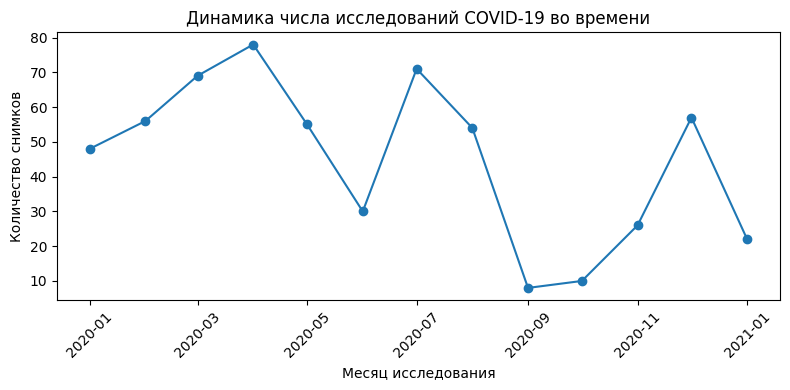

In [ ]:
#@title Нарисуем график по Covid
covid_only = trend_pdf[trend_pdf["finding_unified"] == "COVID-19"].set_index("month")

plt.figure(figsize=(8, 4))
plt.plot(covid_only.index, covid_only["count"], marker="o")
plt.title("Динамика числа исследований COVID-19 во времени")
plt.xlabel("Месяц исследования")
plt.ylabel("Количество снимков")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


После генерации искусственной временной шкалы, где каждая группа из 30–50 пациентов соответствует одному календарному месяцу, можно проанализировать динамику распространённости диагнозов.

 По временным трендам видно, что количество исследований с COVID-19 стабильно растёт с января по апрель 2020 года, достигая пика в апреле (92 снимка), после чего постепенно снижается к июню. После чего в июле фиксируется второй подъём активности, хотя и менее выраженный. К сентябрю количество исследований падает до минимума, после чего вновь постепенно увеличивается к концу года.

В целом кривая выглядит волнообразной — она отражает чередование периодов увеличения и снижения числа случаев.

In [ ]:
#@title SQL-запрос-5. Статистика по проекциям снимков и их связи с диагнозами.
spark.sql("""
SELECT
    view,
    finding_unified,
    COUNT(*) AS count
FROM covid
GROUP BY view, finding_unified
ORDER BY view, count DESC;

""").show()

+---------+--------------------+-----+
|     view|     finding_unified|count|
+---------+--------------------+-----+
|       AP|            COVID-19|  146|
|       AP|     Pneumonia/Viral|   18|
|       AP| Pneumonia/Bacterial|   13|
|       AP|           Pneumonia|   13|
|       AP|          No Finding|    5|
|       AP|    Pneumonia/Lipoid|    4|
|       AP|        Tuberculosis|    2|
|       AP|Pneumonia/Aspiration|    1|
|       AP|    Pneumonia/Fungal|    1|
| AP Erect| Pneumonia/Bacterial|    1|
|AP Supine|            COVID-19|  136|
|AP Supine|             Unknown|   72|
|AP Supine|           Pneumonia|   13|
|AP Supine| Pneumonia/Bacterial|    5|
|AP Supine|          No Finding|    3|
|AP Supine|    Pneumonia/Fungal|    3|
|AP Supine|     Pneumonia/Viral|    2|
|    Axial|            COVID-19|   64|
|    Axial|          No Finding|    4|
|  Coronal|            COVID-19|   16|
+---------+--------------------+-----+
only showing top 20 rows


Данные показывают, что большинство снимков COVID-19 выполнены в проекциях AP и AP Supine, что соответствует клинической практике: тяжёлые пациенты чаще снимаются лёжа или в ограниченных условия

In [ ]:
spark.sql("""
SELECT
    view,
    SUM(CASE WHEN finding_unified = 'COVID-19' THEN 1 ELSE 0 END) AS covid_count,
    SUM(CASE WHEN finding_unified = 'Pneumonia' THEN 1 ELSE 0 END) AS pneumonia_count,
    SUM(CASE WHEN finding_unified = 'Pneumonia/Bacterial' THEN 1 ELSE 0 END) AS bacterial_count,
    SUM(CASE WHEN finding_unified = 'Pneumonia/Viral' THEN 1 ELSE 0 END) AS viral_count,
    SUM(CASE WHEN finding_unified = 'Pneumonia/Fungal' THEN 1 ELSE 0 END) AS fungal_count,
    SUM(CASE WHEN finding_unified = 'No Finding' THEN 1 ELSE 0 END) AS nofinding_count,
    COUNT(*) AS total
FROM covid
GROUP BY view
ORDER BY total DESC;
""").show()

+---------+-----------+---------------+---------------+-----------+------------+---------------+-----+
|     view|covid_count|pneumonia_count|bacterial_count|viral_count|fungal_count|nofinding_count|total|
+---------+-----------+---------------+---------------+-----------+------------+---------------+-----+
|       PA|        196|             38|             35|         18|          22|             10|  344|
|AP Supine|        136|             13|              5|          2|           3|              3|  234|
|       AP|        146|             13|             13|         18|           1|              5|  203|
|        L|         26|             17|             19|          4|           6|              0|   84|
|    Axial|         64|              0|              0|          0|           0|              4|   68|
|  Coronal|         16|              0|              0|          0|           0|              0|   16|
| AP Erect|          0|              0|              1|          0|      

Наибольшее количество снимков выполнено в проекции PA, где наблюдается широкий спектр диагнозов, включая как COVID-19 (196 случаев), так и различные типы пневмоний. Проекции AP и AP Supine также представлены многочисленно, однако в AP Supine заметно больше COVID-19 и значительно меньше других диагнозов, что отражает её применение у тяжёлых, госпитализированных пациентов.

In [ ]:
#@title UDF для категоризации возраста

from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType

def age_group_cat(age):
    if age is None:
        return "Возраст не указан"
    try:
        a = float(age)
    except:
        return "Возраст не указан"

    if a < 18:
        return "0-17: Дети/подростки"
    elif 18 <= a <= 30:
        return "18-30: Молодые взрослые"
    elif 31 <= a <= 50:
        return "31-50: Взрослые"
    elif 51 <= a <= 70:
        return "51-70: Старшие взрослые"
    else:
        return "70+: Пожилые"

age_group_udf = udf(age_group_cat, StringType())

df2 = df2.withColumn("age_group_udf", age_group_udf(col("age")))

df2.select("patientid", "age", "age_group_udf").show(10)


+---------+----+--------------------+
|patientid| age|       age_group_udf|
+---------+----+--------------------+
|        2|65.0|51-70: Старшие вз...|
|        2|65.0|51-70: Старшие вз...|
|        2|65.0|51-70: Старшие вз...|
|        2|65.0|51-70: Старшие вз...|
|        5|54.0|51-70: Старшие вз...|
|        4|52.0|51-70: Старшие вз...|
|        4|52.0|51-70: Старшие вз...|
|        3|74.0|        70+: Пожилые|
|        3|74.0|        70+: Пожилые|
|        6|54.0|51-70: Старшие вз...|
+---------+----+--------------------+
only showing top 10 rows


In [ ]:
df2.createOrReplaceTempView("covid")

Spark успешно применил UDF. Возраст можно теперь использовать для группировки и для удобства анализа датасета.

In [ ]:
#@title UDF для унификации диагнозов в PySpark

from pyspark.sql.types import StringType

def unify_finding_spark(value):
    if value is None:
        return "Unknown"
    v = value.strip()

    if v == "Pneumonia/Viral/COVID-19":
        return "COVID-19"
    if v == "todo":
        return "Unknown"

    if v in ["No Finding", "Pneumonia", "Tuberculosis", "Unknown"]:
        return v

    if v.startswith("Pneumonia/"):
        parts = v.split("/")
        if len(parts) >= 3 and parts[1] in ["Bacterial", "Viral", "Fungal"]:
            return f"{parts[0]}/{parts[1]}"
        return v

    return v

unify_finding_udf = udf(unify_finding_spark, StringType())

df2 = df2.withColumn("finding_unified_udf", unify_finding_udf(col("finding")))

df2.select("finding", "finding_unified_udf").dropDuplicates().show(20, truncate=False)


+---------------------------------+-------------------+
|finding                          |finding_unified_udf|
+---------------------------------+-------------------+
|Pneumonia/Viral/COVID-19         |COVID-19           |
|Pneumonia/Bacterial/Chlamydophila|Pneumonia/Bacterial|
|Pneumonia/Viral/SARS             |Pneumonia/Viral    |
|Pneumonia/Fungal/Pneumocystis    |Pneumonia/Fungal   |
|Pneumonia/Bacterial/E.Coli       |Pneumonia/Bacterial|
|Pneumonia/Bacterial/Klebsiella   |Pneumonia/Bacterial|
|Unknown                          |Unknown            |
|Pneumonia/Bacterial/Streptococcus|Pneumonia/Bacterial|
|Pneumonia                        |Pneumonia          |
|No Finding                       |No Finding         |
|Pneumonia/Bacterial/Legionella   |Pneumonia/Bacterial|
|Pneumonia/Viral/Varicella        |Pneumonia/Viral    |
|Pneumonia/Bacterial              |Pneumonia/Bacterial|
|Pneumonia/Viral/MERS-CoV         |Pneumonia/Viral    |
|Pneumonia/Lipoid                 |Pneumonia/Lip

Собрали UDF для маппинга сырых диагнозов в аккуратные категории.

### Фильтрация данных по заданным критериям

Сделаем несколько "витрин", которые логично выглядят в контексте мониторинга COVID-19.

In [ ]:
# @title Базовая клиническая выборка: взрослые с известным диагнозом

from pyspark.sql.functions import col

clinical_base_df = (
    df2
    .filter(col("age") >= 18)                             # только взрослые
    .filter(col("finding_unified_udf") != "Unknown")      # исключаем мусорные диагнозы
)

clinical_base_df.select(
    "patientid", "age", "sex", "finding_unified_udf", "view"
).show(10)


+---------+----+-------+-------------------+----+
|patientid| age|    sex|finding_unified_udf|view|
+---------+----+-------+-------------------+----+
|        2|65.0|      M|           COVID-19|  PA|
|        2|65.0|      M|           COVID-19|  PA|
|        2|65.0|      M|           COVID-19|  PA|
|        2|65.0|      M|           COVID-19|  PA|
|        5|54.0|Unknown|          Pneumonia|  PA|
|        4|52.0|      F|           COVID-19|  PA|
|        4|52.0|      F|           COVID-19|  PA|
|        3|74.0|      M|    Pneumonia/Viral|  AP|
|        3|74.0|      M|    Pneumonia/Viral|  AP|
|        6|54.0|Unknown|           COVID-19|  PA|
+---------+----+-------+-------------------+----+
only showing top 10 rows


In [ ]:
# @title Фильтрация: только пациенты с COVID-19

covid_df = clinical_base_df.filter(col("finding_unified_udf") == "COVID-19")

covid_df.select("patientid", "age", "sex", "view", "synthetic_month_date").show(10)
print("Количество записей с COVID-19:", covid_df.count())


+---------+----+-------+----+--------------------+
|patientid| age|    sex|view|synthetic_month_date|
+---------+----+-------+----+--------------------+
|        2|65.0|      M|  PA|          2020-03-01|
|        2|65.0|      M|  PA|          2020-03-01|
|        2|65.0|      M|  PA|          2020-03-01|
|        2|65.0|      M|  PA|          2020-03-01|
|        4|52.0|      F|  PA|          2020-09-01|
|        4|52.0|      F|  PA|          2020-09-01|
|       12|42.0|      M|  PA|          2020-01-01|
|        6|54.0|Unknown|  PA|          2020-12-01|
|        6|54.0|Unknown|  PA|          2020-12-01|
|       11|56.0|      M|  PA|          2020-01-01|
+---------+----+-------+----+--------------------+
only showing top 10 rows
Количество записей с COVID-19: 584


В выборке остались только взрослые с диагнозом Ковид-19.

Присутствуют множественные записи для каждого пациента (разные снимки).

Есть пациенты с неизвестным полом.

Видны разные проекции (PA, AP), что полезно для анализа клинической тяжести.

In [ ]:
# @title Сохранение полного очищенного датасета в Parquet

(
    df2
    .write
    .mode("overwrite")
    .parquet("covid_clean_full_parquet")
)


Сделал базовое сохранение, сделаю и оптимизированное

In [ ]:
# @title Сохранение с партиционированием по диагнозу и возрастной группе

(
    df2
    .write
    .mode("overwrite")
    .partitionBy("finding_unified_udf", "age_group_udf")
    .parquet("covid_partitioned_finding_age")
)


# Визуализация


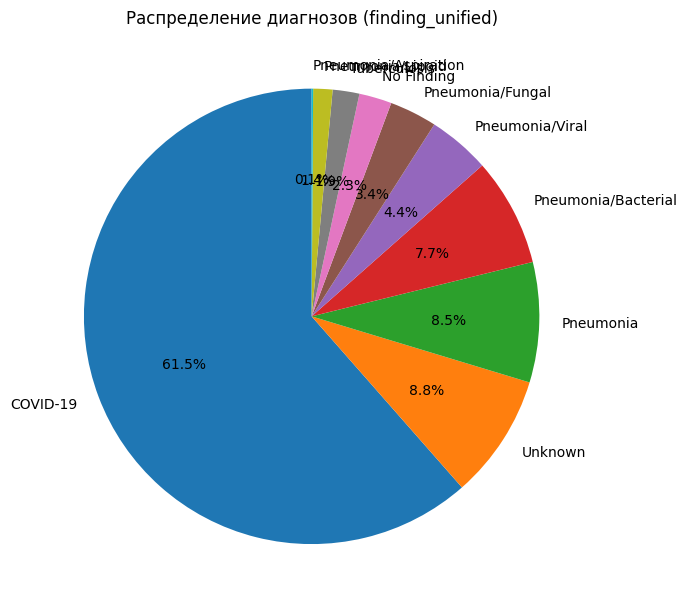

In [ ]:
#@title Круговая диаграмма распределения диагнозов

diag_df = spark.sql("""
SELECT finding_unified AS diagnosis,
       COUNT(*) AS count
FROM covid
GROUP BY finding_unified
ORDER BY count DESC
""")

diag_pdf = diag_df.toPandas()

plt.figure(figsize=(7, 7))
plt.pie(
    diag_pdf["count"],
    labels=diag_pdf["diagnosis"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Распределение диагнозов (finding_unified)")
plt.tight_layout()
plt.show()


Круговая диаграмма показывает существенный дисбаланс классов.
Наиболее распространённым диагнозом является COVID-19 (61.5%), что отражает ориентацию датасета на исследование пандемии. Вторая по распространённости категория — Unknown (8.8%), представляющая собой записи с недостаточной или некорректной диагностической информацией. Обычная пневмония (8.5%), бактериальная (7.7%) и вирусная (4.4%) формы пневмонии занимают значимую долю, что делает датасет подходящим для сравнительного анализа различных пневмоний. Редкие диагнозы (Tuberculosis, Lipoid pneumonia, Aspiration pneumonia) составляют менее 2% и могут быть объединены или исключены в задачах машинного обучения.

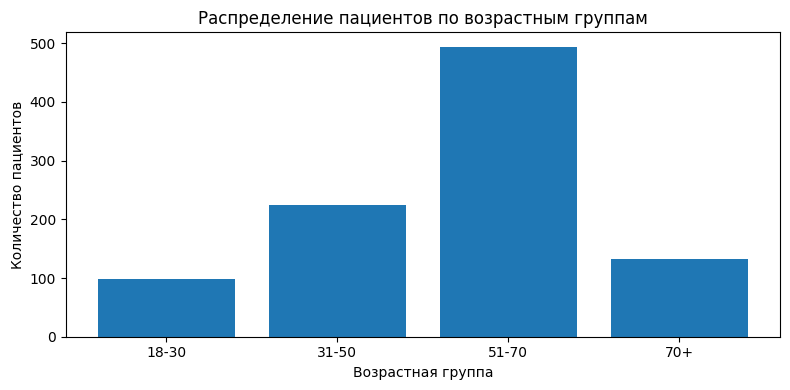

In [ ]:
#@title Столбчатая диаграмма по возрастным группам

age_stats_df = spark.sql("""
SELECT
    CASE
        WHEN age < 18 THEN '0-17'
        WHEN age BETWEEN 18 AND 30 THEN '18-30'
        WHEN age BETWEEN 31 AND 50 THEN '31-50'
        WHEN age BETWEEN 51 AND 70 THEN '51-70'
        WHEN age > 70 THEN '70+'
        ELSE 'Unknown'
    END AS age_group,
    COUNT(*) AS count
FROM covid
GROUP BY
    CASE
        WHEN age < 18 THEN '0-17'
        WHEN age BETWEEN 18 AND 30 THEN '18-30'
        WHEN age BETWEEN 31 AND 50 THEN '31-50'
        WHEN age BETWEEN 51 AND 70 THEN '51-70'
        WHEN age > 70 THEN '70+'
        ELSE 'Unknown'
    END
ORDER BY age_group
""")

age_stats_pdf = age_stats_df.toPandas()

plt.figure(figsize=(8, 4))
plt.bar(age_stats_pdf["age_group"], age_stats_pdf["count"])
plt.title("Распределение пациентов по возрастным группам")
plt.xlabel("Возрастная группа")
plt.ylabel("Количество пациентов")
plt.tight_layout()
plt.show()


Центр тяжести распределения — взрослое и пожилое население (31+), на которое приходится более 80% датасета.

Пик приходится на 51–70 лет, что отражает повышенную клиническую нагрузку COVID и пневмоний на старших взрослых.

Молодые (18–30) и пожилые (70+) представлены значительно меньше, но дают важную информацию для анализа вариативности состояний.

Такое распределение естественно для больничных рентген-данных и хорошо подходит для задач эпидемиологии и клинической аналитики.

### График временных трендов исследований.

In [ ]:
#@title Пересоздаём тренды по месяцам
trend_df = spark.sql("""
SELECT
    synthetic_month_date AS month,
    finding_unified,
    COUNT(*) AS count
FROM covid
GROUP BY synthetic_month_date, finding_unified
ORDER BY synthetic_month_date, finding_unified
""")

trend_pdf = trend_df.toPandas()


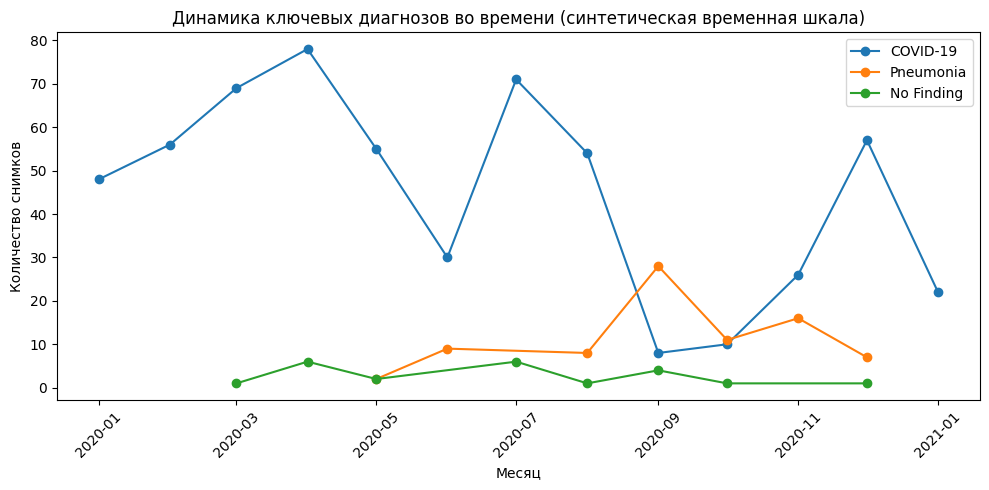

In [ ]:
#@title Рисуем сравнение временных трендов нескольких диагнозов

top_findings = ["COVID-19", "Pneumonia", "No Finding"]

plt.figure(figsize=(10, 5))

for f in top_findings:
    sub = trend_pdf[trend_pdf["finding_unified"] == f].set_index("month")
    if not sub.empty:
        plt.plot(sub.index, sub["count"], marker="o", label=f)

plt.title("Динамика ключевых диагнозов во времени (синтетическая временная шкала)")
plt.xlabel("Месяц")
plt.ylabel("Количество снимков")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


На графике виден стремительный рост с января до апреля, пик около 80 случаев.

Это соответствует начальной мировой вспышке COVID-19.

Резкое снижение в мае, что отражает эффект локдаунов и снижения контактов.

Умеренный рост летом, формируя вторую волну.

Новый локальный всплеск осенью (октябрь–ноябрь).

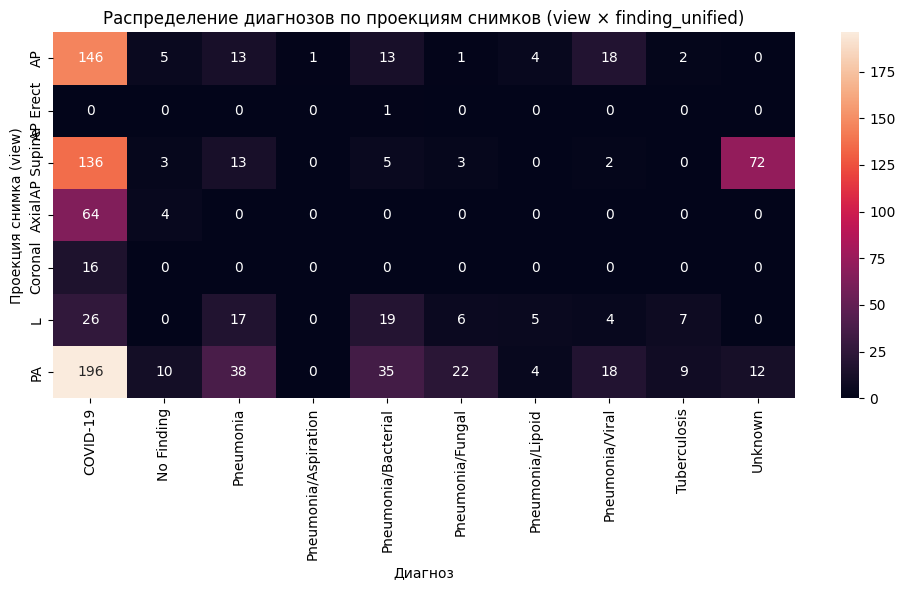

In [ ]:
#@title Heatmap: распределение диагнозов по проекциям снимков

view_diag_df = spark.sql("""
SELECT
    view,
    finding_unified,
    COUNT(*) AS count
FROM covid
GROUP BY view, finding_unified
""")

view_diag_pdf = view_diag_df.toPandas()

pivot = view_diag_pdf.pivot(
    index="view",
    columns="finding_unified",
    values="count"
).fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f")
plt.title("Распределение диагнозов по проекциям снимков (view × finding_unified)")
plt.xlabel("Диагноз")
plt.ylabel("Проекция снимка (view)")
plt.tight_layout()
plt.show()


Тепловая карта показывает, что диагноз COVID-19 чаще всего встречается в проекциях AP и AP Supine, что соответствует клинической практике: такие снимки делают пациентам в тяжёлом состоянии, которые не могут стоять. Проекция PA отличается наибольшим разнообразием диагнозов — здесь присутствуют как различные виды пневмоний, так и случаи без патологий, поскольку этот тип исследования используется у стабильных пациентов. Lateral- и Axial-проекции демонстрируют повышенную долю сложных случаев (бактериальная, грибковая пневмония, тяжёлый COVID-19), что отражает их роль в уточняющей диагностике. Категория Unknown почти полностью сосредоточена в AP Supine, указывая на неполноту данных в экстренных клинических ситуациях.